Stage_2_HB_Task Code 2.4:
Biochemistry & Oncology



In [ ]:
 #Import Dataset

import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
sift_path = "https://raw.githubusercontent.com/HackBio-Internship/public_datasets/main/R/datasets/sift.tsv"
foldX_path = "https://raw.githubusercontent.com/HackBio-Internship/public_datasets/main/R/datasets/foldX.tsv"
df_sift = pd.read_csv(sift_path, sep=r"\s+")
df_foldX = pd.read_csv(foldX_path, sep=r"\s+")

In [ ]:
#Create Unique Identifier
df_sift['specific_Protein_aa'] = df_sift['Protein'].str.cat(df_sift['Amino_Acid'], sep='_')
df_foldX['specific_Protein_aa'] = df_foldX['Protein'].str.cat(df_foldX['Amino_Acid'], sep='_')

In [ ]:
#Merge Datasets
merged_df = pd.merge(df_sift[["Protein", "Amino_Acid", 'specific_Protein_aa', 'sift_Score']],
                     df_foldX[['specific_Protein_aa', 'foldX_Score']],
                     on='specific_Protein_aa')

In [ ]:
#Identify Deleterious Mutations
mutations_deleterious_df = merged_df.loc[(merged_df["sift_Score"] < 0.05) & (merged_df["foldX_Score"] > 2)]

In [ ]:
#Analyze Amino Acid Substitution
frequency_table = {}
for row in mutations_deleterious_df["Amino_Acid"]:
    first_aa = row[0]
    frequency_table[first_aa] = frequency_table.get(first_aa, 0) + 1

In [ ]:
#Generate Frequency Table
keys = list(frequency_table.keys())
values = list(frequency_table.values())

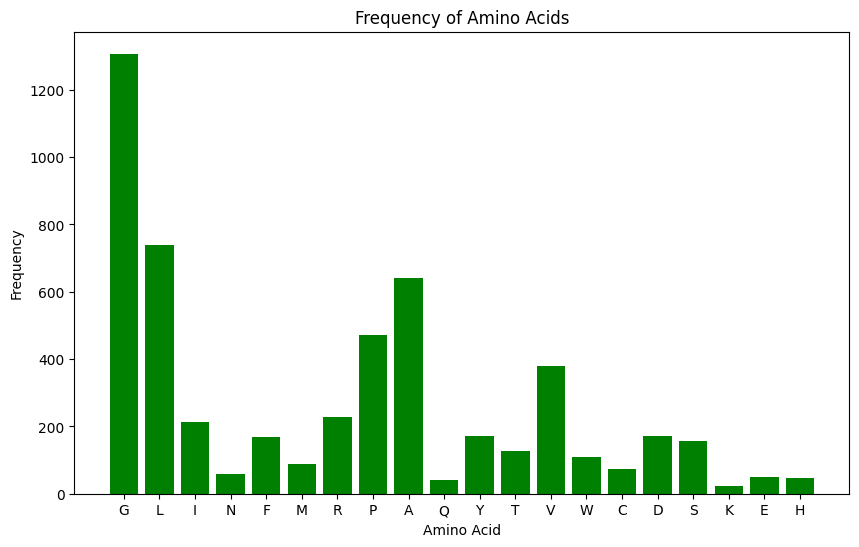

In [ ]:
#Visualize Data
plt.figure(figsize=(10, 6))
plt.bar(keys, values, color='green')
plt.xlabel('Amino Acid')
plt.ylabel('Frequency')
plt.title('Frequency of Amino Acids')
plt.savefig('Bar_plot_of_Frequency_of_Amino_Acids.png')
plt.show()


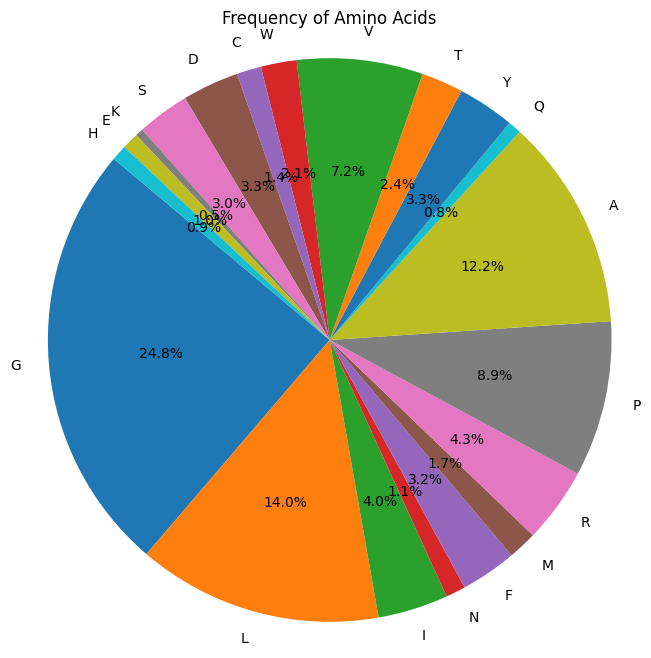

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(values, labels=keys, autopct='%1.1f%%', startangle=140)
plt.title('Frequency of Amino Acids')
plt.axis('equal')
plt.savefig('Pie_chart_of_Frequency_of_Amino_Acids.png')
plt.show()